# Darts- Data Analytics and Reporting for Time Series

In [1]:
!pip install -q darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [2]:
!pip install -q matplotlib

**Univariate**

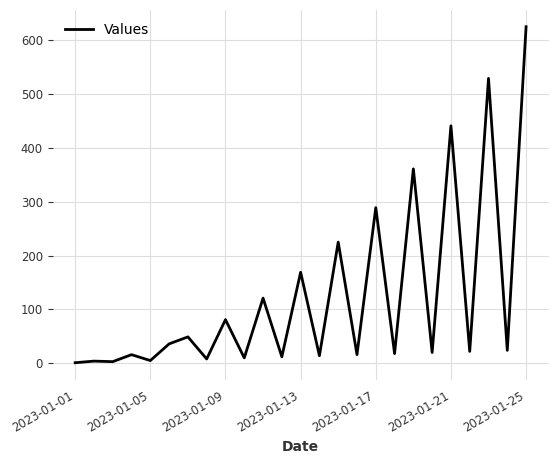

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 1.8 K 
4 | V             | Linear           | 21    
---------------------------------------------------
1.9 K     Trainable params
0         Non-trainable params
1.9 K     Total params
0.007     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (4) is smal

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicted values: <TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[1.15501707]],

       [[0.06298346]],

       [[1.33848913]],

       [[0.07003208]],

       [[1.46961504]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-21 2023-01-22 ... 2023-01-25
  * component  (component) object 'Values'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


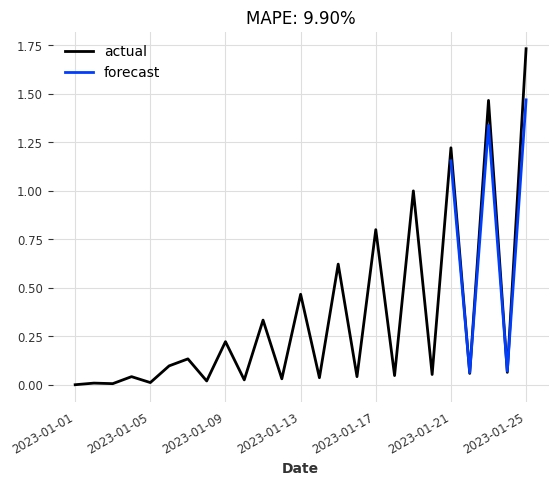

In [3]:
import datetime

import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
import matplotlib.pyplot as plt

timeseries_data = [1, 4, 3, 16, 5, 36, 49, 8, 81, 10, 121, 12, 169, 14, 225, 16, 289, 18, 361, 20, 441, 22, 529, 24,
                   625]


def create_date_list(start_date, end_date):
    date_list = []
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += datetime.timedelta(days=1)
    return date_list


date = create_date_list('2023-01-01', '2023-01-25')
df = pd.DataFrame({'Date': date, 'Values': timeseries_data})

series = TimeSeries.from_dataframe(df, 'Date', 'Values')

series.plot()
plt.show()

train, val = series.split_after(pd.Timestamp('2023-01-20'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=4,
    n_epochs=2000,
    optimizer_kwargs={'lr': 1e-3},
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42,
    training_length=5,
    input_chunk_length=4,
    force_reset=True
)

my_model.fit(train_transformed,
             verbose=True)

predicted = my_model.predict(n=len(val_transformed))

print("Predicted values:", predicted)

series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()


**Future multivariate**

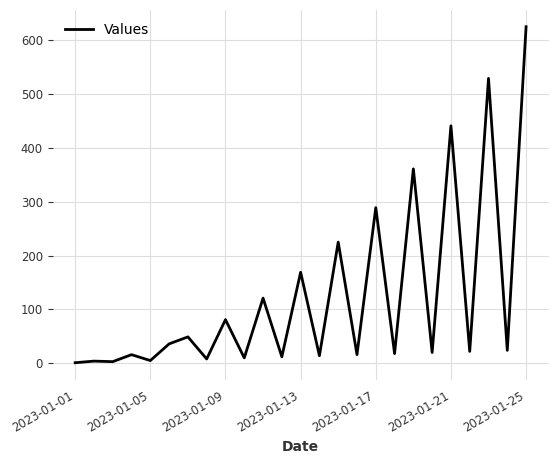

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 1.9 K 
4 | V             | Linear           | 21    
---------------------------------------------------
1.9 K     Trainable params
0         Non-trainable params
1.9 K     Total params
0.008     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (4) is smal

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicted values: <TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[1.1963309 ]],

       [[0.06528024]],

       [[1.37264318]],

       [[0.08054992]],

       [[1.51644942]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-21 2023-01-22 ... 2023-01-25
  * component  (component) object 'Values'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


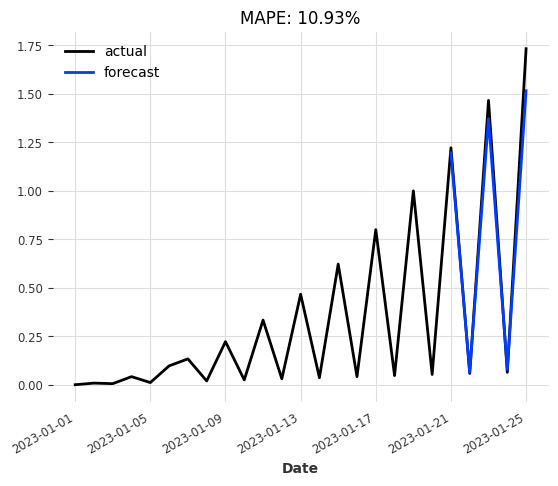

In [4]:
import datetime

import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
import matplotlib.pyplot as plt

timeseries_data = [1, 4, 3, 16, 5, 36, 49, 8, 81, 10, 121, 12, 169, 14, 225, 16, 289, 18, 361, 20, 441, 22, 529, 24,
                   625]

covariate_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


def create_date_list(start_date, end_date):
    date_list = []
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += datetime.timedelta(days=1)
    return date_list


date = create_date_list('2023-01-01', '2023-01-25')
df = pd.DataFrame({'Date': date, 'factor': covariate_data, 'Values': timeseries_data})

series = TimeSeries.from_dataframe(df, 'Date', 'Values')

series.plot()
plt.show()

train, val = series.split_after(pd.Timestamp('2023-01-20'))
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

covariates = TimeSeries.from_dataframe(df, 'Date', 'factor')
cov_train, cov_val = covariates.split_after(pd.Timestamp('2023-01-20'))

my_model = RNNModel(
    model='LSTM',
    hidden_dim=20,
    dropout=0,
    batch_size=4,
    n_epochs=2000,
    optimizer_kwargs={'lr': 1e-3},
    model_name='Air_RNN',
    log_tensorboard=True,
    random_state=42,
    training_length=5,
    input_chunk_length=4,
    force_reset=True
)

my_model.fit(train_transformed,
             future_covariates=covariates,
             verbose=True)

predicted = my_model.predict(n=len(val_transformed))

print("Predicted values:", predicted)

series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()

**Past multivariaite**

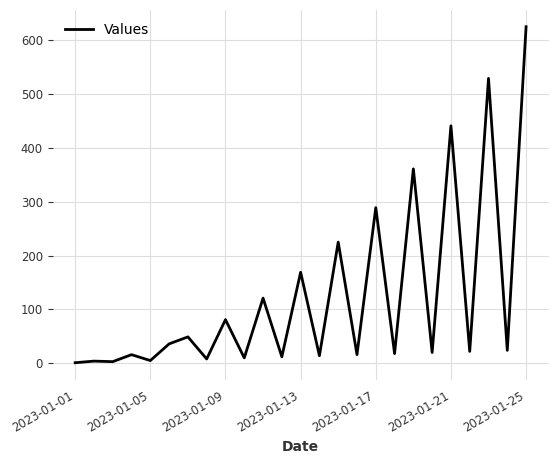

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.9 K 
4 | fc            | Sequential       | 78    
---------------------------------------------------
3.0 K     Trainable params
0         Non-trainable params
3.0 K     Total params
0.012     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicted values: <TimeSeries (DataArray) (Date: 3, component: 1, sample: 1)>
array([[[1.09358535]],

       [[0.08126892]],

       [[1.30924327]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-01-23 2023-01-24 2023-01-25
  * component  (component) object 'Values'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


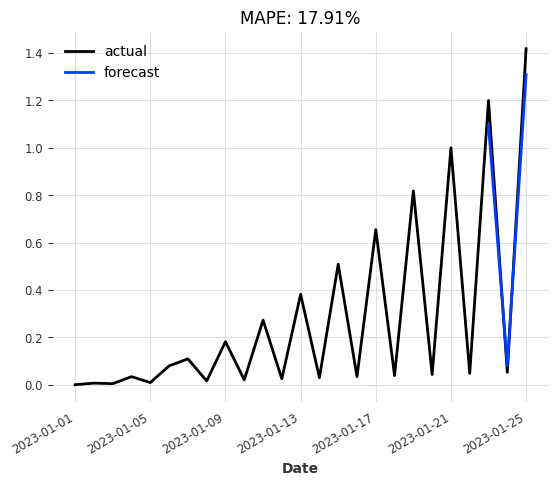

In [5]:
import datetime

import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel, BlockRNNModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
import matplotlib.pyplot as plt

timeseries_data = [1, 4, 3, 16, 5, 36, 49, 8, 81, 10, 121, 12, 169, 14, 225, 16, 289, 18, 361, 20, 441, 22, 529, 24,
                   625]

covariate_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


def create_date_list(start_date, end_date):
    date_list = []
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += datetime.timedelta(days=1)
    return date_list


date = create_date_list('2023-01-01', '2023-01-25')
df = pd.DataFrame({'Date': date, 'factor': covariate_data, 'Values': timeseries_data})

series = TimeSeries.from_dataframe(df, 'Date', 'Values')

series.plot()
plt.show()

train, val = series.split_after(pd.Timestamp('2023-01-22'))
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

covariates = TimeSeries.from_dataframe(df, 'Date', 'factor')
cov_train, cov_val = covariates.split_after(pd.Timestamp('2023-01-22'))

my_model = BlockRNNModel(
    model='LSTM',
    input_chunk_length=4,
    output_chunk_length=3,
    n_epochs=2000,
    random_state=0
)

my_model.fit(train_transformed,
             past_covariates=cov_train,
             verbose=True)

predicted = my_model.predict(n=3)

print("Predicted values:", predicted)

series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed)))
plt.legend()
plt.show()